# Problem Session 2
## Intro to Supervised Learning & Simple Linear Regression

The problems in this notebook will cover the content covered in our introductory `Supervised Learning` and `Regression` lectures including:
- `A Supervised Learning Framework`,
- `Data Splits for Predictive Modeling` and
- `Simple Linear Regression`.

They also serve as a good lead-in to `A First Predictive Modeling Project`.

##### 1. Introducing `carseats.csv`

In this notebook you will work with a data set provided by <a href="https://www.statlearning.com/">An Introduction to Statistical Learning</a>. These data provide the sales (in thousands) of child car seats at fictional retailers along with various features that may or may not be related to those sales figures. You can find descriptions of each variable in this data set here, <a href="https://rdrr.io/cran/ISLR/man/Carseats.html">https://rdrr.io/cran/ISLR/man/Carseats.html</a>.

##### a. Load the data

The file `carseats.csv` is stored in the `Data` folder. Load the data in using `pandas`.

In [1]:
## Sample Solution
import pandas as pd

In [2]:
## Sample Solution
carseats = pd.read_csv("../Data/carseats.csv")

In [3]:
carseats.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
347,6.88,96,39,0,161,112,Good,27,14,No,No
380,9.64,106,64,10,17,89,Medium,68,17,Yes,Yes
289,8.75,143,77,25,448,156,Medium,43,17,Yes,Yes
280,2.86,121,86,10,496,145,Bad,51,10,Yes,Yes
222,7.49,136,119,6,178,145,Medium,35,13,Yes,Yes


##### b. What is it?

What kind of supervised learning problem could be solved with this data set, regression or classification?

##### Sample Solution

Because `Sales` is a numeric variable, this is a regression problem.

##### c. Use cases

Describe specific example(s) of how these data could be used for:
1. Making predictions and
2. Making inferences.

##### Sample Solution

1. These data could be used to aid in decisions for new retail location placement. For example, a location could be chosen so that the predicted carseat sales is maximized according to some model.

2. These data could be used to infer what impact, if any, shelf location (`ShelveLoc`) has on sales. If there appears to be an association between shelf location and sales, the company may want to act on that association by charging car seat companies a higher premium for the best shelf location. In addition the company could look to test that association and design an "A/B" test to check for causality.

##### d. Data set size

How many observations are in this data set?

In [4]:
##### Sample Solution
print(len(carseats))

400


#### Predictive Model

You have been tasked by the Carseats Corporation to build a predictive model using these data. Specifically, corporate wants a model that predicts carseat `Sales`.

In this notebook we will restrict ourselves to a single feature model, but more on that soon.

##### 2. Train test split

The first step in predictive modeling is performing a train test split. Perform a train test split on these data, setting aside $20\%$ of the data as a test set. Choose a `random_state` so your results are reproducible.

##### Sample Solution

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
car_train, car_test = train_test_split(carseats.copy(),
                                          shuffle=True,
                                          random_state=440,
                                          test_size=.2)

##### 3. Exploratory data analysis (EDA)

After a train test split it is typical that you will explore your data set a bit. This step is sometimes called <i>exploratory data analysis</i> or <i>EDA</i> for short. Here you will work through a guided EDA.

##### a. Scatter Plots

For this first modeling notebook we will stick to models that use a single quantitative/continuous feature to predict `Sales`, this means we are most interested in any predictive relationship that may exist between `Sales` and the following columns:
- `CompPrice`,
- `Income`,
- `Advertising`,
- `Population`,
- `Price`,
- `Age` and
- `Education`.

Make scatter plots with `Sales` on the vertical axis and these other columns on the horizontal axis.

These could be individual plots or a <i>scatter matrix</i>, which is a matrix of scatter plots. <i>A scatter matrix can be quickly created with `seaborn`'s `pairplot` function, <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html">https://seaborn.pydata.org/generated/seaborn.pairplot.html</a> or `pandas`'s `scatter_matrix` function, <a href="https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html">https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html</a>.</i>

When making these plots, you should look for which feature appears to have the biggest impact on `Sales`.

<b>Note:</b> you should only use the training set for EDA when doing predictive modeling.

##### Sample Solution

In [7]:
import matplotlib.pyplot as plt
from seaborn import pairplot, set_style

set_style("whitegrid")

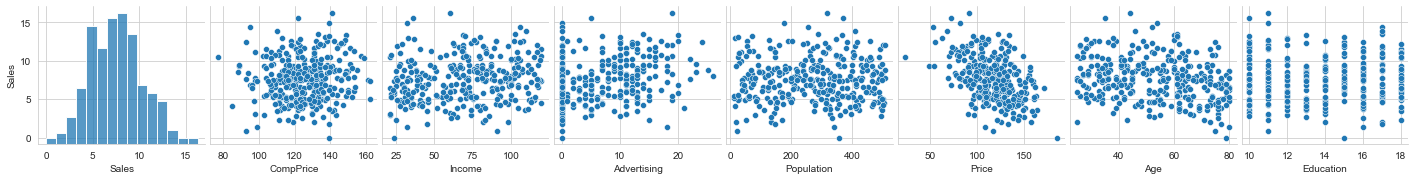

In [8]:
pairplot(car_train[['Sales', 'CompPrice', 'Income', 'Advertising', 
                        'Population', 'Price', 'Age', 'Education']],
            y_vars = ['Sales'])

plt.show()

##### b. Pearson correlation

Another part of EDA is calculating descriptive statistics.

One statistic of interest to us in this situation is the <i>Pearson correlation coefficient</i>. For two variables $x$ and $y$ with $n$ observations each the Pearson correlation is given by:

$$
r = \frac{\sum_{i=1}^n \left( x_i - \overline{x} \right) \left( y_i - \overline{y}  \right)}{\sqrt{\sum_{i=1}^n \left(x_i - \overline{x}\right)^2 \sum_{i=1}^n \left(y_i - \overline{y} \right)^2}} = \frac{\text{cov}\left(x, y\right)}{\sigma_x \sigma_y},
$$

where $x_i$ is the $i^\text{th}$ observation, $\overline{x} = \sum_{i=1}^n x_i/n$, $\text{cov}\left( x, y \right)$ is the covariance between $x$ and $y$, and $\sigma_x$ denotes the standard deviation of $x$.

$r \in [-1,1]$ gives a sense of the strength of the linear relationship between $x$ and $y$. The closer to $1$ $|r|$ is, the stronger the linear relationship between $x$ and $y$, the sign of $r$ determines the direction of the relationship, with $r < 0$ meaning a line with a negative slope and $r > 0$ a line with a positive slope.

Calculate the correlation between `Sales` and the previously mentioned columns.

<i>Hint: If you are unsure how to do this quickly, perform a web search like "pandas correlation" or "numpy correlation"</i>.

##### Sample Solution

In [9]:
car_train[['Sales', 'CompPrice', 'Income', 'Advertising', 
                        'Population', 'Price', 'Age', 'Education']].corr()['Sales'].sort_values()

Price         -0.440030
Age           -0.266597
Education     -0.016907
Population     0.002853
CompPrice      0.074090
Income         0.161741
Advertising    0.260679
Sales          1.000000
Name: Sales, dtype: float64

or....

In [10]:
import numpy as np

In [11]:
np.corrcoef(car_train[['Sales', 'CompPrice', 'Income', 'Advertising', 
                        'Population', 'Price', 'Age', 'Education']], rowvar=False)[:,0]

array([ 1.        ,  0.07409045,  0.16174131,  0.26067876,  0.00285274,
       -0.4400301 , -0.26659688, -0.01690685])

##### c. Choosing a feature

Using the EDA you just completed choose a single feature to use to predict `Sales`.

<i>Your answer should be one of:</i>
- `CompPrice`,
- `Income`,
- `Advertising`,
- `Population`,
- `Price`,
- `Age` and
- `Education`.

###### Sample Answer

`Price`.

##### 4. Modeling

Now we will work to build some predictive models. By the end of this question you will have built three predictive models and compared them using cross-validation.

##### a. A baseline

When doing predictive modeling it is good practice to have <i>baseline model</i> which is a simple "model" solely for comparison purposes. These are not typically, complex or good models, but they are important reference points to give us a sense of how well our models are actually performing.

A standard regression model baseline is to just predict the average value of $y$ for any value of $X$. In this setting that model looks like this:

$$
\text{Baseline Model: } \ \ \ \ \text{Sales} = E(\text{Sales}) + \epsilon,
$$

where $\epsilon$ is some random noise.

Write some code to estimate $E(\text{Sales})$ using our training set.

In [12]:
## Sample Solution
car_train.Sales.mean()

7.590593749999999

##### b. Simple linear regression

Follow the steps laid out below to fit a simple linear regression model regressing `Sales` on the feature you chose at the end of your EDA.

In [13]:
## import LinearRegression
from sklearn.linear_model import LinearRegression

In [14]:
## Make a model object here
slr = LinearRegression(copy_X = True)

## Fit the model
slr.fit(car_train.Price.values.reshape(-1,1),
           car_train.Sales.values)

LinearRegression()

##### c. $k$ nearest neighbors regression

An alternative regression model that we will learn about later is called $k$ nearest neighbors regression. This model works by taking the average value of $y$ for $X$'s $k$ nearest neighbors in the training set. There will be a lecture notebook explaining this model more clearly, for now just use it as practice for making and fitting a model object in `sklearn`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html</a>.

Follow the prompts in the code chunks below.

In [15]:
## Import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

In [16]:
## Make a KNeighborsRegressor object with k = 5
## This can be done by calling KNeighborsRegressor(5)
knr = KNeighborsRegressor(5)

## Fit the model with your chose feature
## This is done in the same way as you fit simple linear regression
knr.fit(car_train.Price.values.reshape(-1,1),
           car_train.Sales.values)

KNeighborsRegressor()

##### d. Plot the three models

Before properly evaluating the models let's visualize them on our training set.

Make a figure that plots the following things:
- The training data with `Sales` on the vertical axis and your feature on the horizontal axis,
- The baseline model plotted as a solid red line,
- The simple linear regression model plotted as a black dotted line and
- The $k$ nearest neighbors regression model plotted as a magenta dot-dash line.

There is some helpful code already written below.

In [17]:
import numpy as np

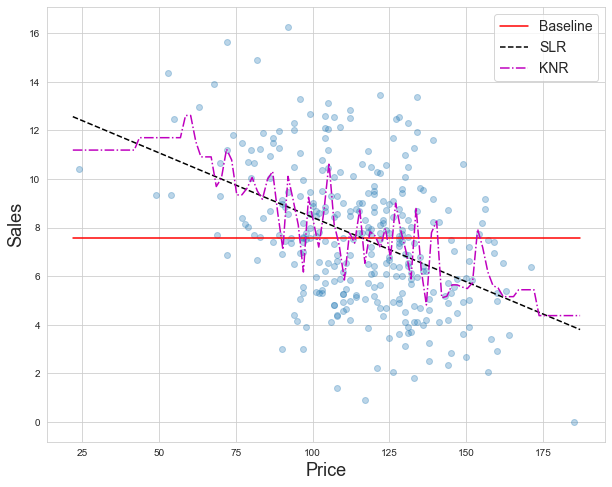

In [18]:
## Making the figure
plt.figure(figsize=(10,8))


## Place the scatter plot here
plt.scatter(car_train.Price,
               car_train.Sales,
               alpha = .3)

## place the string of your chose feature here
feature = 'Price'

## Use this variable to make model lines
x = np.linspace(car_train[feature].min() - 2, car_train[feature].max() + 2, 100)

## Plotting the models ##
## Baseline
plt.plot(x, car_train.Sales.mean()*np.ones(100), 'r-', label="Baseline")

## SLR
plt.plot(x, slr.predict(x.reshape(-1,1)), 'k--', linewidth = 1.5, label="SLR")

## KNR
plt.plot(x, knr.predict(x.reshape(-1,1)), 'm-.', linewidth = 1.5, label="KNR")

plt.legend(fontsize=14)

plt.xlabel(feature, fontsize=18)
plt.ylabel("Sales", fontsize=18)

plt.show()



##### e. Cross-Validation 

In this problem you will try to implement $5$-fold cross-validation (CV) to compare these three models to see which one has the lowest average cross-validation mean squared error (MSE).

Because this may be your first time implementing CV, some of the code will be filled in for you.

In [19]:
## import KFold here
from sklearn.model_selection import KFold

## import mean_squared_error
from sklearn.metrics import mean_squared_error

In [20]:
## Make a KFold object
## remember to set a random_state and set shuffle = True
kfold = KFold(5,
              random_state = 614,
              shuffle=True)




## This array will hold the mse for each model and split
mses = np.zeros((3, 5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(car_train[feature], car_train['Sales']):
    ## cv training set
    car_tt = car_train.iloc[train_index]
    
    ## cv holdout set
    car_ho = car_train.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model
    baseline_pred = car_tt.Sales.mean()*np.ones(len(car_ho))
    
    mses[0, i] = mean_squared_error(car_ho.Sales, baseline_pred)
    
    ## Fit and get ho mse for slr
    slr = LinearRegression(copy_X = True)
    
    slr.fit(car_tt[feature].values.reshape(-1,1),
               car_tt.Sales.values)
    
    mses[1, i] = mean_squared_error(car_ho.Sales, slr.predict(car_ho[feature].values.reshape(-1,1)))
    
    ## Fit and get ho mse for slr
    knr = KNeighborsRegressor(5)
    
    knr.fit(car_tt[feature].values.reshape(-1,1),
               car_tt.Sales.values)
    
    mses[2, i] = mean_squared_error(car_ho.Sales, knr.predict(car_ho[feature].values.reshape(-1,1)))
    
    i = i + 1

In [21]:
## Find the avg cv mse for each model here
np.mean(mses, axis=1)

array([7.9477983 , 6.44940686, 7.9210285 ])

##### f. "Best" model.

Based on the results of e. which model appears to have performed the best?

##### Sample Solution

The Simple Linear Regression model has the lowest avg. CV. MSE.

##### End of notebook

We will not touch the test set in this notebook because we will continue to work with the carseats data set as we learn more regression model types.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)